# Data Exploration

In [1]:
#Fist, import pandas, a data processing library
import pandas as pd
#Also import seaborn, a Python graphing library
#Current version of seaborn generates a bunch of warnings that we will ignore
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
#Load Iris flower dataset, which is already uploaded on Jupiter Notebook folder
data=pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Seeing the number of observations for each species in the data
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
data.shape

(150, 6)

In [6]:
#Checking if the data is clean
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Check if there are duplicates
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(150, 6)

In [9]:
data.drop(columns=['Id'], inplace=True)

In [10]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#Summary measures of statistics
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

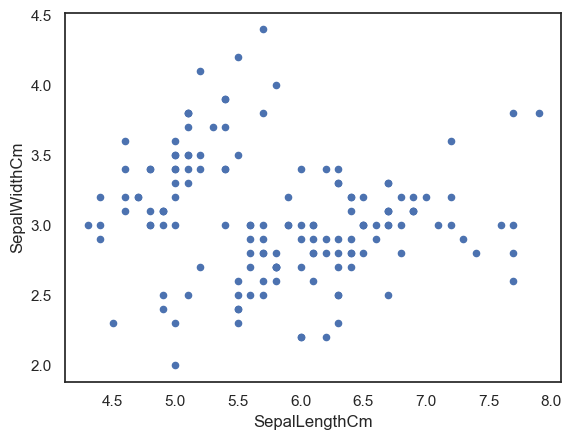

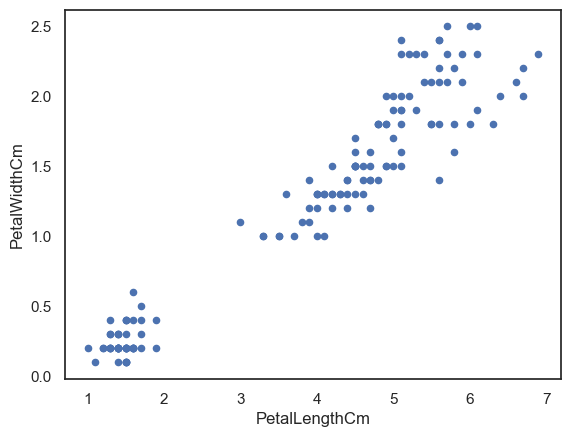

In [12]:
#First we can  plot using the .plot extension from pandas dataframes
#We will use the extension to plot a scatterplot of the Iris features
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
data.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

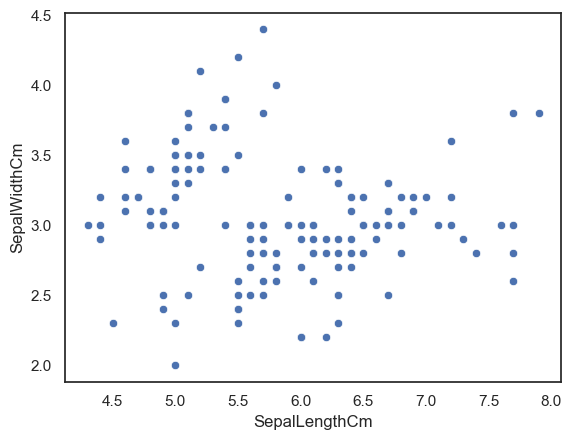

In [13]:
# We can also use the seaborn library to make a similar plot
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", data=data)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

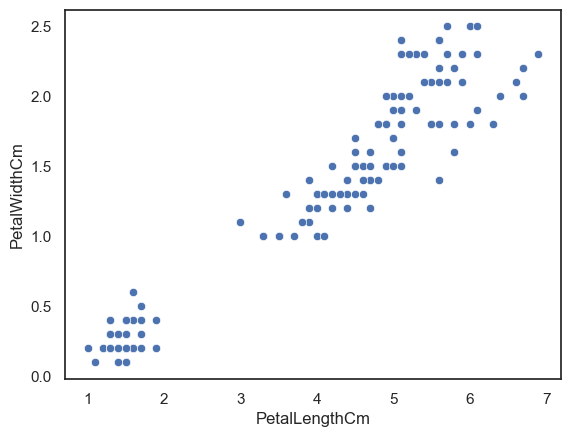

In [14]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", data=data)

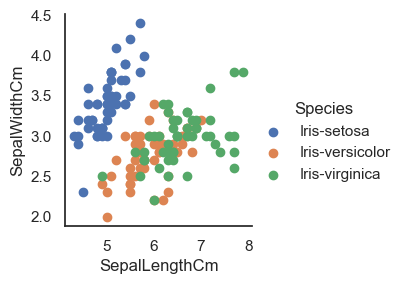

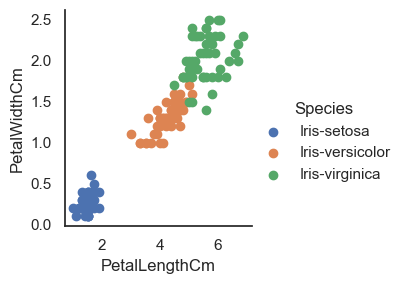

In [15]:
#One piece of information missing in the plots above is what species each plant is
#We will use seaborn's FaceGrid to color the scatterplot by species
sns.FacetGrid(data, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
sns.FacetGrid(data, hue="Species") \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

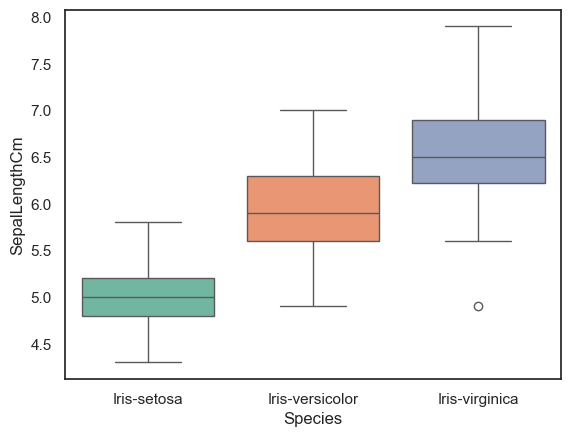

In [16]:
#We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="SepalLengthCm", data=data, palette="Set2")

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

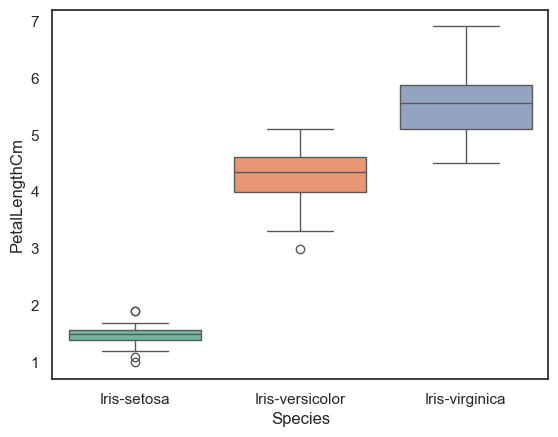

In [17]:
sns.boxplot(x="Species", y="PetalLengthCm", data=data, palette="Set2")

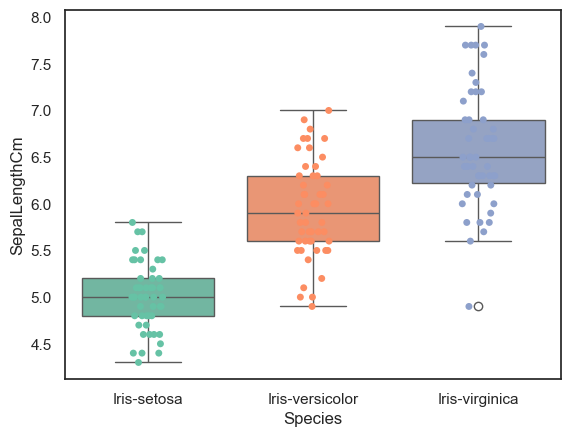

In [18]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=data, palette="Set2")
ax = sns.stripplot(x="Species", y="SepalLengthCm", data=data, jitter=True, edgecolor="gray", palette="Set2")

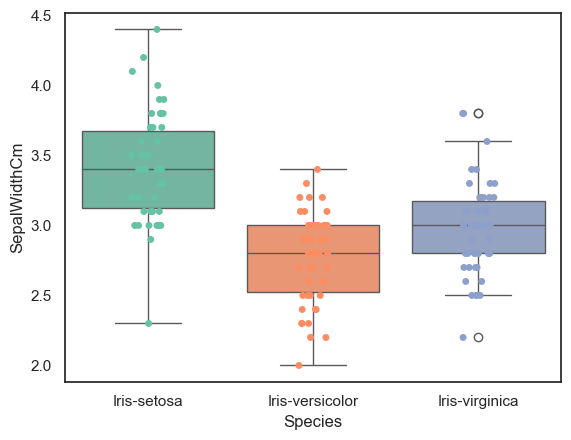

In [19]:
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=data, palette="Set2")
ax = sns.stripplot(x="Species", y="SepalWidthCm", data=data, jitter=True, edgecolor="gray", palette="Set2")

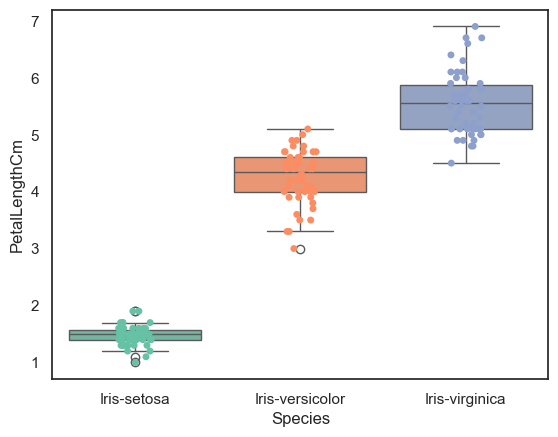

In [20]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=data, palette="Set2")
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=data, jitter=True, edgecolor="gray", palette="Set2")

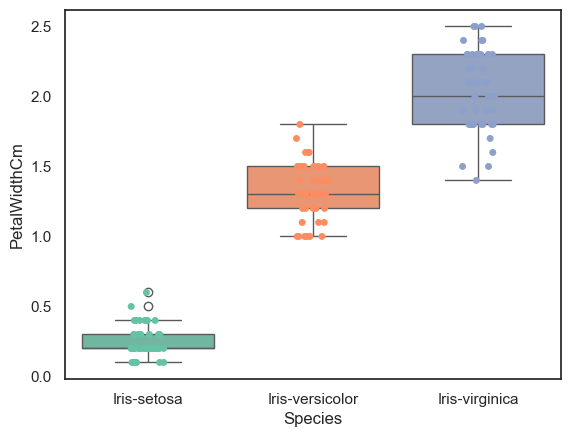

In [21]:
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=data, palette="Set2")
ax = sns.stripplot(x="Species", y="PetalWidthCm", data=data, jitter=True, edgecolor="gray", palette="Set2")

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

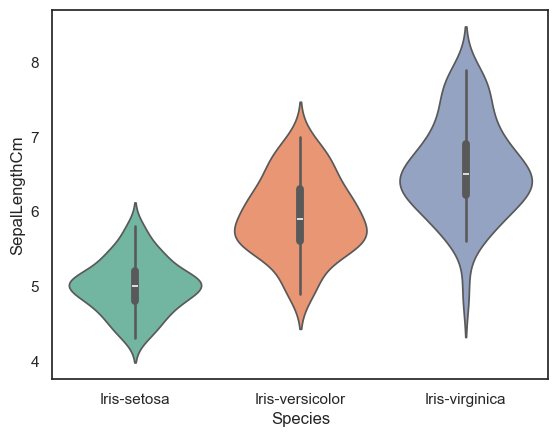

In [22]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="SepalLengthCm", data=data, palette="Set2")

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

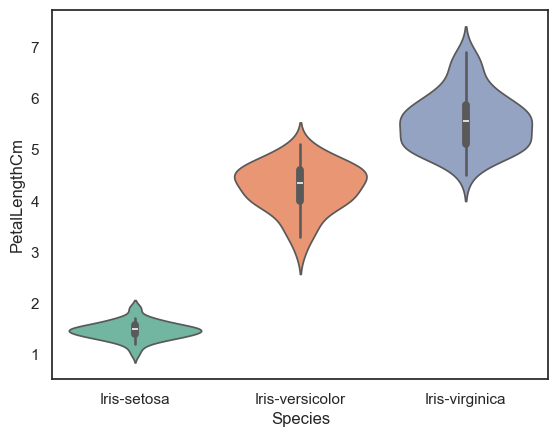

In [23]:
sns.violinplot(x="Species", y="PetalLengthCm", data=data, palette="Set2")

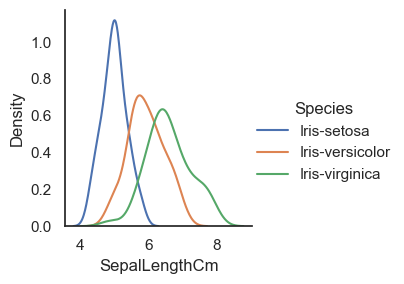

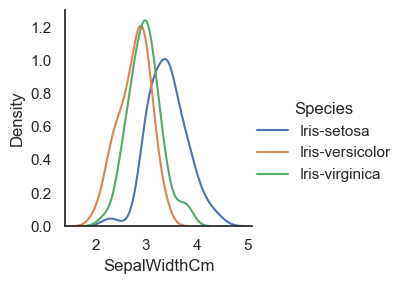

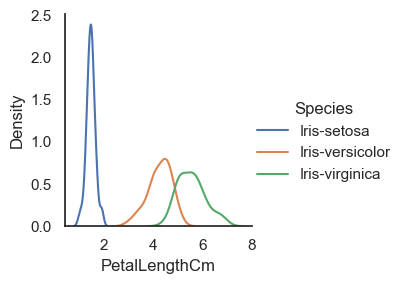

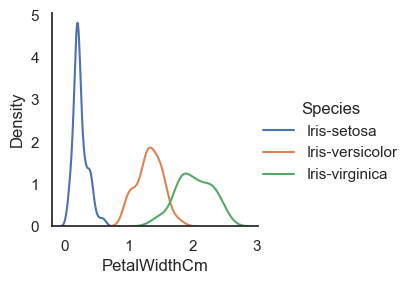

In [24]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
#The taller distribution shows a large variance (variation) and flatter one shows smaller variance(variation)
# The distributin located to the right of one another has higher average (mean) than the one located to the left of the other
sns.FacetGrid(data, hue="Species") \
   .map(sns.kdeplot, "SepalLengthCm") \
   .add_legend()

sns.FacetGrid(data, hue="Species") \
   .map(sns.kdeplot, "SepalWidthCm") \
   .add_legend()

sns.FacetGrid(data, hue="Species") \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

sns.FacetGrid(data, hue="Species") \
   .map(sns.kdeplot, "PetalWidthCm") \
   .add_legend()

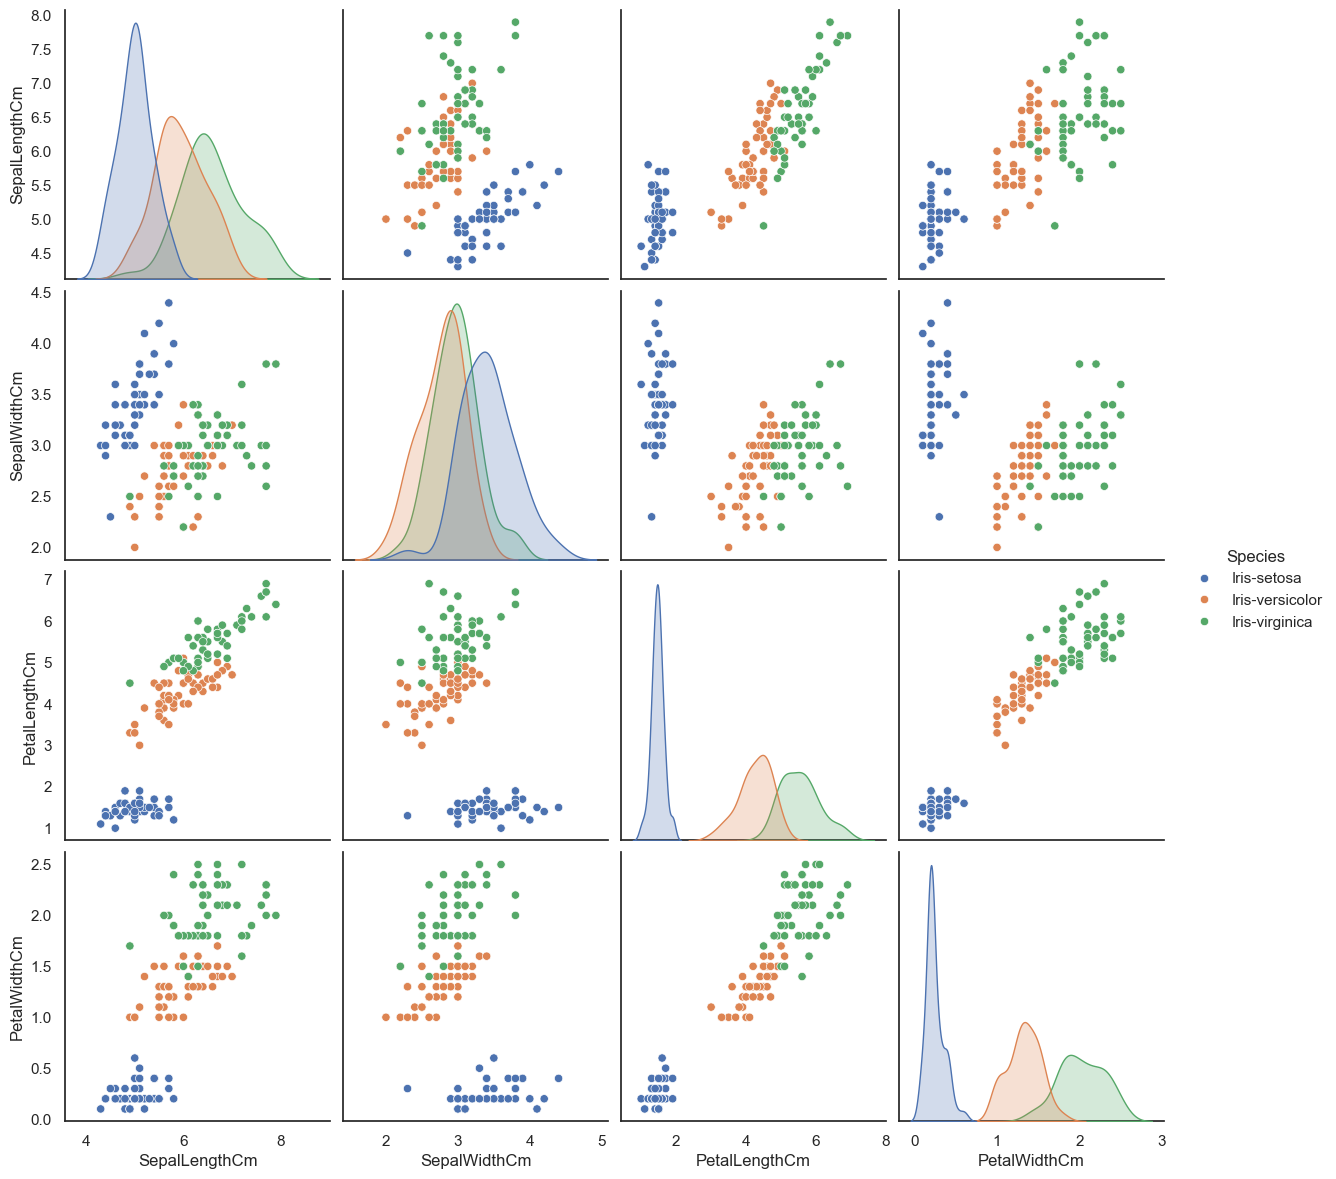

In [25]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(data, hue="Species", size=3)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
Iris=data.drop(columns=['Species'], inplace=True)

<Axes: >

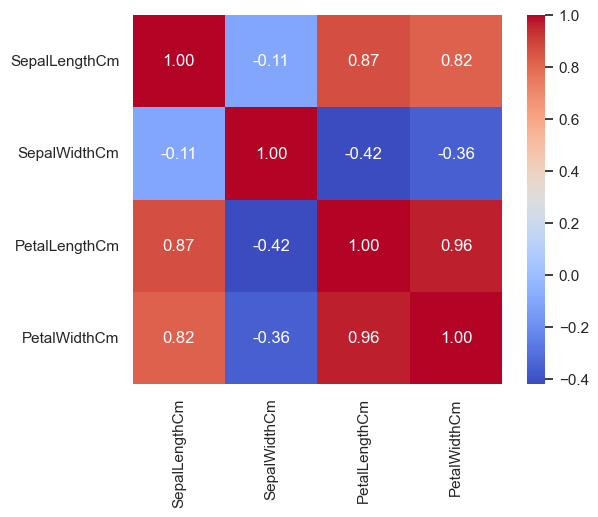

In [28]:
# Correlation analysis
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)